In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold

from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [2]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_test[11].astype(np.float64))
y=np.array(y_test[12].astype(np.float64))
z=np.array(y_test[13].astype(np.float64))

x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
x_test=x_test.astype(np.float64)
y_test=y_test.astype(np.float64)

def MEE(x, y):
    return np.mean(np.linalg.norm(x - y, 2, axis=1))


In [ ]:
C=[10000]
plt.figure(1,(12,4))

g=[0.2,0.3]
for i,gamma in enumerate(g):
    parameters_SVM = {
    'estimator__C':C,
    'estimator__kernel': ['rbf'],
    'estimator__gamma':[gamma],
    'estimator__epsilon':[0.05],
}
    grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring=make_scorer(MEE, greater_is_better=False),
)
        
    SVM=grid_search_SVM.fit(x_train, y_train)
    cv_results_df = pd.DataFrame(grid_search_SVM.cv_results_)
    error=cv_results_df['mean_test_score'].values
    plt.subplot(1,len(g),i+1)
    #plt.subplots_adjust(wspace=0)
    if i==0:
        plt.ylabel('MEE validation')
    plt.title(r'$\gamma$='+str(gamma))
    plt.errorbar(C,-error,marker='.',linestyle='')
    plt.xlabel('C')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.2,30)
    #plt.xticks([0,10,20,30])
    #plt.legend()

plt.show()

## SVM RBF

In [7]:

parameters_SVM= {
    'estimator__C': [1,10,100,1000,10000,20000],
    'estimator__kernel': ['rbf'],
    'estimator__gamma':[0.01,0.2,1,5],
    'estimator__epsilon': [0.1,0.3] 
}      

# with GridSearch
grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring=make_scorer(MEE, greater_is_better=False),
)

In [ ]:
SVM=grid_search_SVM.fit(x_train, y_train)
print(grid_search_SVM.best_params_) 
print('Best Score - Validation:', grid_search_SVM.best_score_ )

y_pred_SVM =SVM.predict(x_test)

print('Accuracy Score - SVM - Test-error:', MEE(y_test, y_pred_SVM))
cv_results_df = pd.DataFrame(grid_search_SVM.cv_results_)
cv_results_df


## SVM poly

In [ ]:

C=np.logspace(0,4,5)

gamma=np.logspace(-2,2,5)

coef=np.linspace(0,10,3)

deg=np.arange(2,6,3)

parameters_SVM= {
    'estimator__C':[0.5],
    'estimator__kernel': ['poly'],
    'estimator__gamma':['scale'],
    'estimator__coef0':coef ,
    'estimator__degree':[5] ,
    'estimator__epsilon': [0.1] 
}      

# with GridSearch
grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring=make_scorer(MEE, greater_is_better=False),
)

SVM=grid_search_SVM.fit(x_train, y_train)
print(grid_search_SVM.best_params_) 
print('Best Score - Validation:', grid_search_SVM.best_score_ )

y_pred_SVM =SVM.predict(x_test)

print('Accuracy Score - SVM - Test-error:', MEE(y_test, y_pred_SVM))
cv_results_df = pd.DataFrame(grid_search_SVM.cv_results_)
cv_results_df


## SVM sigmoid

In [20]:

C=np.logspace(0,5,5)

coef=np.linspace(-4,-2,6)


parameters_SVM= {
    'estimator__C':[100000],
    'estimator__kernel': ['sigmoid'],
    'estimator__gamma': ['scale'],#[0.001,0.01,0.05,]
    'estimator__coef0':coef ,
    'estimator__epsilon': [0.1] 
}      

# with GridSearch
grid_search_SVM = GridSearchCV(
    estimator=MultiOutputRegressor(SVR()),
    param_grid=parameters_SVM,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring=make_scorer(MEE, greater_is_better=False),
)

SVM=grid_search_SVM.fit(x_train, y_train)
print(grid_search_SVM.best_params_) 
print('Best Score - Validation:', grid_search_SVM.best_score_ )

y_pred_SVM =SVM.predict(x_test)

print('Accuracy Score - SVM - Test-error:', MEE(y_test, y_pred_SVM))
cv_results_df = pd.DataFrame(grid_search_SVM.cv_results_)
cv_results_df


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 1/5] END estimator__C=100000, estimator__coef0=-4.0, estimator__epsilon=0.1, estimator__gamma=scale, estimator__kernel=sigmoid;, score=(train=-0.291, test=-0.594) total time=   3.2s
[CV 4/5] END estimator__C=100000, estimator__coef0=-4.0, estimator__epsilon=0.1, estimator__gamma=scale, estimator__kernel=sigmoid;, score=(train=-0.293, test=-0.569) total time=   3.4s
[CV 2/5] END estimator__C=100000, estimator__coef0=-4.0, estimator__epsilon=0.1, estimator__gamma=scale, estimator__kernel=sigmoid;, score=(train=-0.292, test=-0.674) total time=   3.6s
[CV 5/5] END estimator__C=100000, estimator__coef0=-4.0, estimator__epsilon=0.1, estimator__gamma=scale, estimator__kernel=sigmoid;, score=(train=-0.291, test=-0.541) total time=   3.7s
[CV 3/5] END estimator__C=100000, estimator__coef0=-4.0, estimator__epsilon=0.1, estimator__gamma=scale, estimator__kernel=sigmoid;, score=(train=-0.296, test=-0.570) total time=   3.8s
[CV 2/5] END estimator__C=100000, estimator__coef0=-3.6, estimator__ep

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,param_estimator__coef0,param_estimator__epsilon,param_estimator__gamma,param_estimator__kernel,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.526465,0.205717,0.021170,0.002643,100000,-4.0,0.1,scale,sigmoid,"{'estimator__C': 100000, 'estimator__coef0': -...",...,-0.589731,0.045603,5,-0.291104,-0.291804,-0.296143,-0.292633,-0.290741,-0.292485,0.001940
1,8.105084,1.382054,0.015303,0.001357,100000,-3.6,0.1,scale,sigmoid,"{'estimator__C': 100000, 'estimator__coef0': -...",...,-0.564477,0.038169,3,-0.245027,-0.244941,-0.254415,-0.247964,-0.246847,-0.247839,0.003480
2,14.708149,1.470381,0.015962,0.001463,100000,-3.2,0.1,scale,sigmoid,"{'estimator__C': 100000, 'estimator__coef0': -...",...,-0.540643,0.036558,2,-0.212824,-0.212496,-0.225587,-0.215004,-0.215511,-0.216284,0.004798
3,31.274796,2.407354,0.016488,0.000999,100000,-2.8,0.1,scale,sigmoid,"{'estimator__C': 100000, 'estimator__coef0': -...",...,-0.539734,0.031860,1,-0.195176,-0.193394,-0.205918,-0.197074,-0.194477,-0.197208,0.004517
4,101.986648,9.713693,0.014655,0.001754,100000,-2.4,0.1,scale,sigmoid,"{'estimator__C': 100000, 'estimator__coef0': -...",...,-0.582333,0.045533,4,-0.209239,-0.215654,-0.220087,-0.212032,-0.214096,-0.214222,0.003636
5,88.119932,23.365249,0.016594,0.002154,100000,-2.0,0.1,scale,sigmoid,"{'estimator__C': 100000, 'estimator__coef0': -...",...,-11.509222,0.851877,6,-7.945467,-7.313302,-7.578491,-8.716515,-7.747693,-7.860294,0.475744


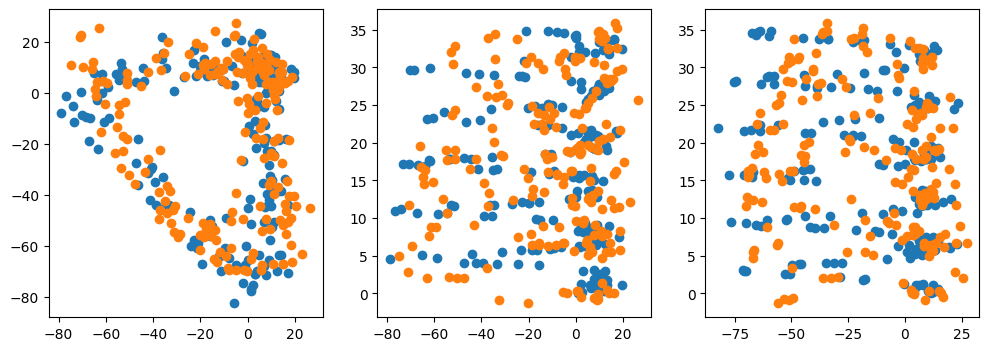

In [15]:
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred_SVM[:,0],y_pred_SVM[:,1])
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred_SVM[:,0],y_pred_SVM[:,2])
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred_SVM[:,1],y_pred_SVM[:,2])